In [1]:
import time
start_time = time.time()

In [2]:
import logging

import numpy as np
import matplotlib.pyplot as plt

import lotka_volterra
import utils.caching
from utils.caching import make_cached_s3
from utils.paths import FIGURES_PATH, S3_BUCKET_NAME
from utils.plotting import plot_sample_thinned

In [3]:
logging.basicConfig()
logging.getLogger(utils.caching.__name__).setLevel(logging.DEBUG)

In [4]:
import nest_asyncio
nest_asyncio.apply()

In [5]:
cached = make_cached_s3(S3_BUCKET_NAME)

Read-only input datasets:

In [6]:
@cached(batch_size=lotka_volterra.n_chains, read_only=True)
def rw_samples(i: int) -> np.ndarray:
    raise NotImplementedError

In [7]:
@cached(batch_size=lotka_volterra.n_chains, read_only=True)
def hmc_samples(i: int) -> np.ndarray:
    raise NotImplementedError

# Naive thinning

In [8]:
n_points_calculate = 10_000
n_points_thinned = 20
n_points_display = 20

The baseline for comparison is the naive thinning approach where we retain each $i$-th element of the sample.

In [9]:
def naive_thin(sample_size, thinned_size):
    return np.linspace(0, sample_size - 1, thinned_size).astype(int)

In [10]:
@cached()
def rw_naive_idx(i: int) -> np.ndarray:
    return naive_thin(rw_samples[i].shape[0], n_points_thinned)

In [11]:
titles = [f'$\\theta^{{(0)}} = ({theta[0]}, {theta[1]}, {theta[2]}, {theta[3]})$' for theta in lotka_volterra.theta_inits]
var_labels = [f'$\\log \\theta_{i + 1}$' for i in range(lotka_volterra.d)]

DEBUG:utils.caching:Reading from disk cache: rw_samples_0
DEBUG:utils.caching:Reading gradient-free-mcmc-postprocessing/rw_samples_0.npy
DEBUG:utils.caching:Reading from disk cache: rw_naive_idx_0
DEBUG:utils.caching:Reading gradient-free-mcmc-postprocessing/rw_naive_idx_0.npy
DEBUG:utils.caching:Reading from disk cache: rw_samples_1
DEBUG:utils.caching:Reading gradient-free-mcmc-postprocessing/rw_samples_1.npy
DEBUG:utils.caching:Reading from disk cache: rw_naive_idx_1
DEBUG:utils.caching:Reading gradient-free-mcmc-postprocessing/rw_naive_idx_1.npy
DEBUG:utils.caching:Reading from disk cache: rw_samples_2
DEBUG:utils.caching:Reading gradient-free-mcmc-postprocessing/rw_samples_2.npy
DEBUG:utils.caching:Reading from disk cache: rw_naive_idx_2
DEBUG:utils.caching:Reading gradient-free-mcmc-postprocessing/rw_naive_idx_2.npy
DEBUG:utils.caching:Reading from disk cache: rw_samples_3
DEBUG:utils.caching:Reading gradient-free-mcmc-postprocessing/rw_samples_3.npy
DEBUG:utils.caching:Reading f

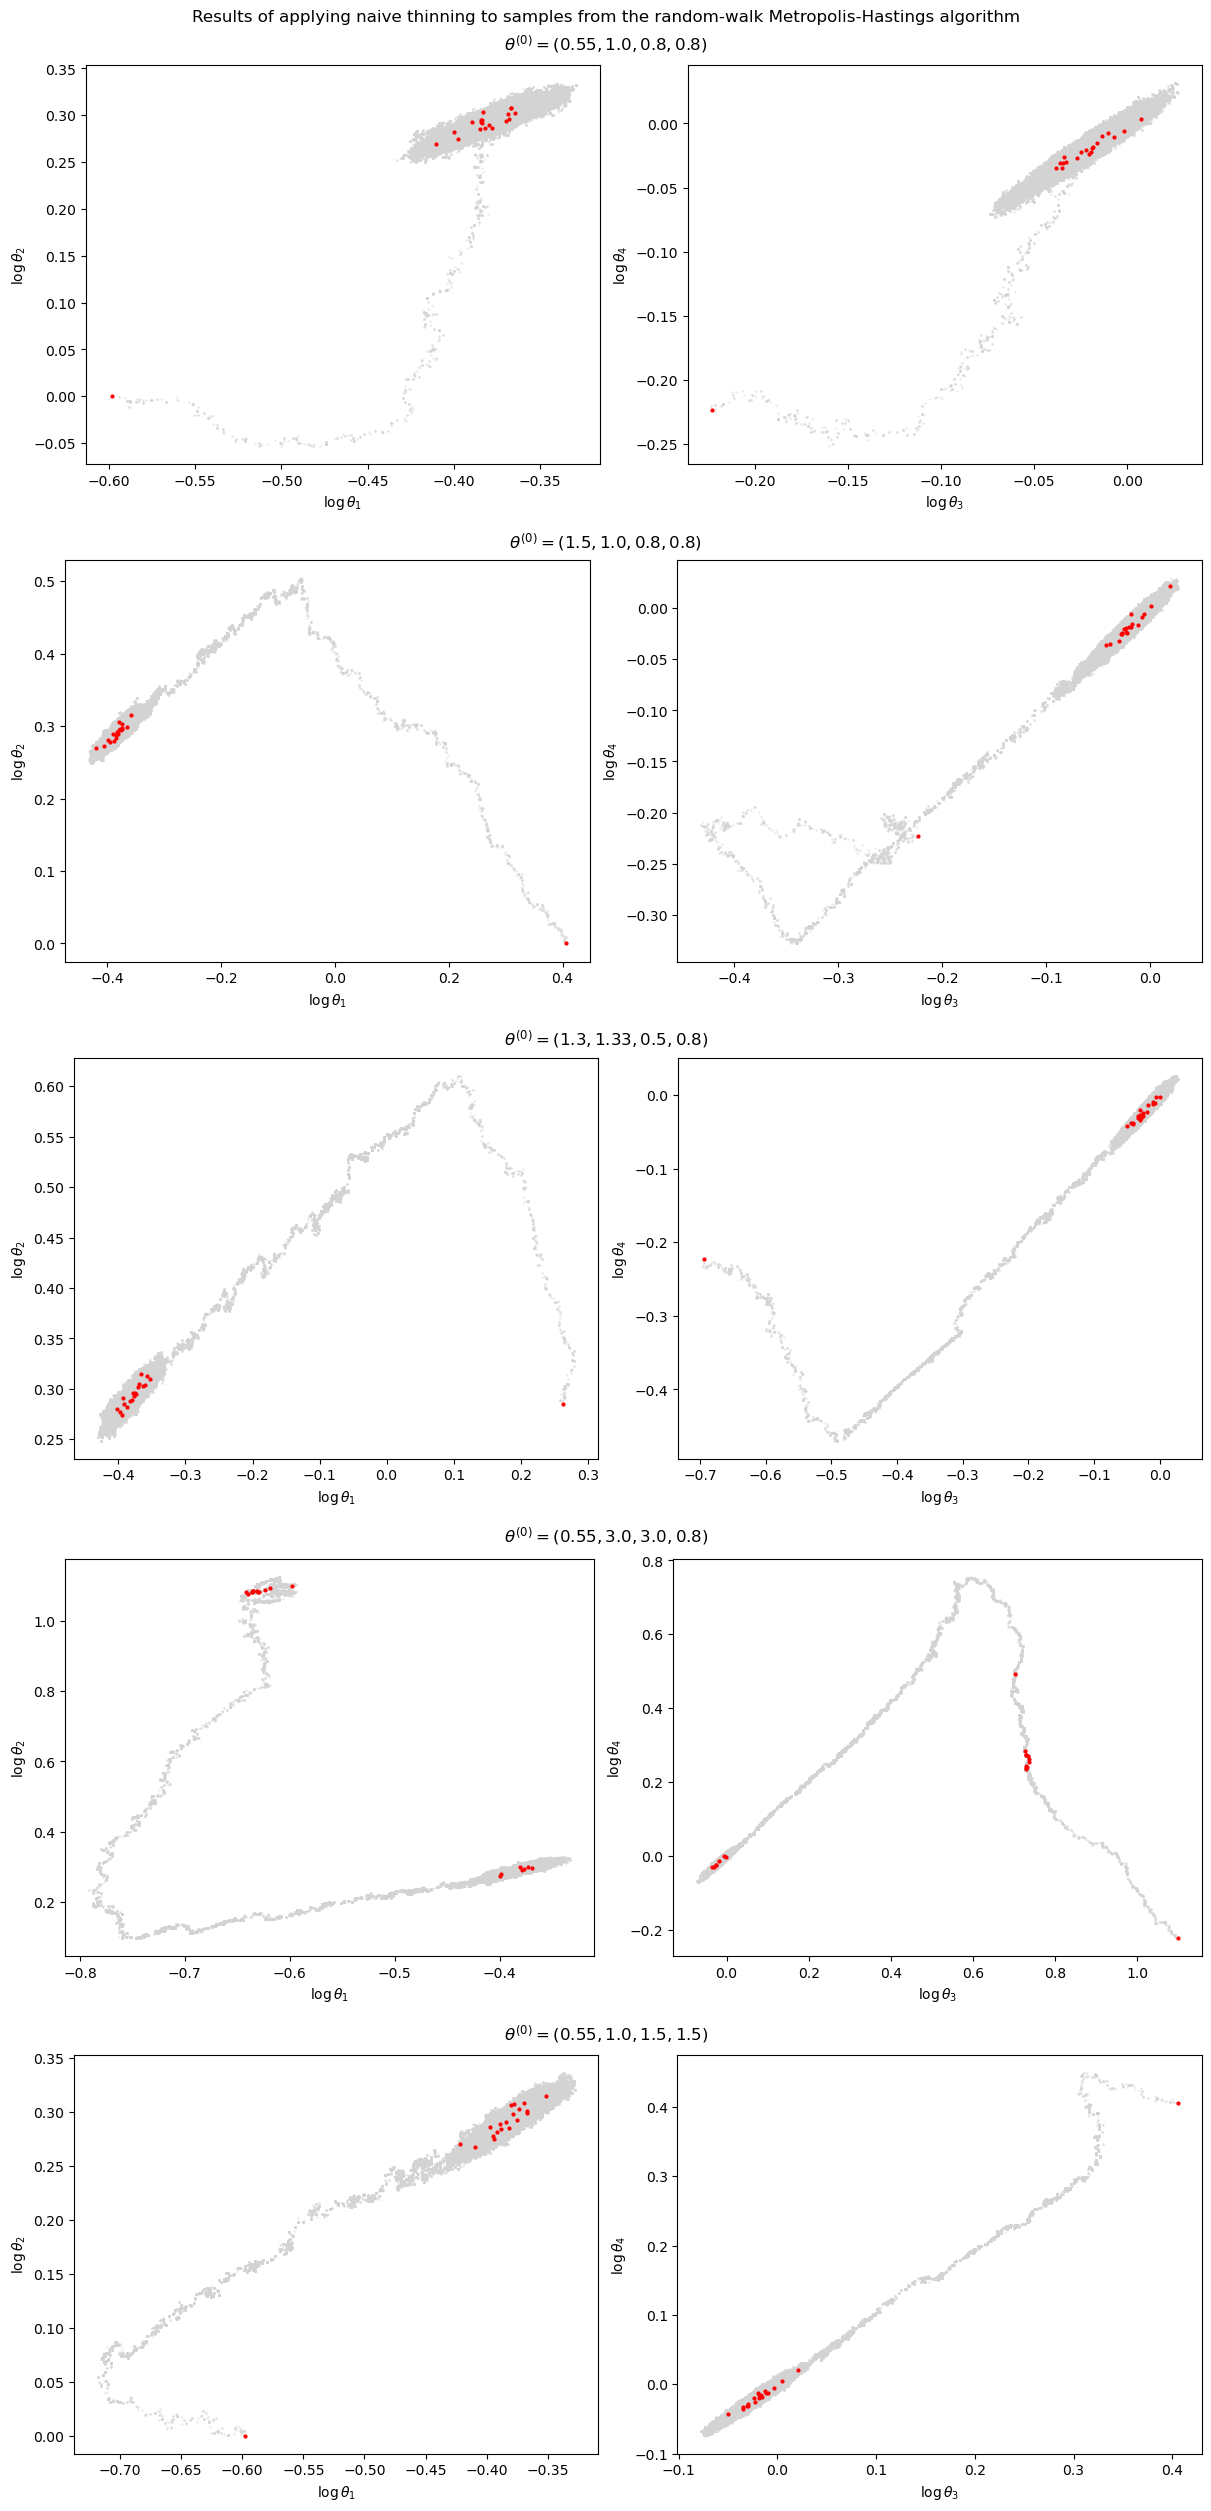

In [12]:
fig = plot_sample_thinned(rw_samples, rw_naive_idx, titles, var_labels);
fig.savefig(FIGURES_PATH / 'lotka-volterra-naive-thinning.png', dpi=300);
fig.suptitle('Results of applying naive thinning to samples from the random-walk Metropolis-Hastings algorithm');

Notebook execution took:

In [13]:
time.time() - start_time

22.01822853088379